## Trabalho final desenvolvido pelos alunos:
- Itor Carlos Souza Queiroz
- Lanna Luara Novaes Silva

Instalação das dependências necessárias

In [12]:
%pip install numpy matplotlib scikit-image



Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import io, color, filters, feature
from skimage.util import img_as_float
from skimage.filters import sobel
from skimage.io import imread
import zipfile
import os
import requests


Define o diretório onde ficará as imagens do dataset que está sendo usado no trabalho

In [14]:
caminho_diretorio = 'dices/'
arquivos = [f for f in os.listdir(caminho_diretorio) if f.endswith(('.png', '.jpg', '.jpeg'))]

Cria uma função para ler as imagens da pasta "dices" para exibir as imagens antes de realizar as próximas operações

In [4]:
def exibe_grade(lista_imagens, titulos, mapa_cor=None):
    n_imagens = len(lista_imagens)
    numero_colunas = 4
    numero_linhas = (n_imagens // numero_colunas) + (1 if n_imagens % numero_colunas != 0 else 0)

    plt.figure(figsize=(15, numero_linhas * 4))
    for i, imagem in enumerate(lista_imagens):
        plt.subplot(numero_linhas, numero_colunas, i + 1)
        plt.imshow(imagem, cmap=mapa_cor if len(imagem.shape) == 2 else None)
        plt.axis("off")
        plt.title(titulos[i])
    plt.tight_layout()
    plt.show()

Definição de uma função para converter as imagens para a escala de cinza. Primeiramente será removido o canal alpha, referente a transparência, caso o mesmo exista.

In [15]:
def converter_para_cinza(lista_entrada):
    lista_saida = []
    for img in lista_entrada:
        # Remove canal alpha (transparência) se existir
        if len(img.shape) == 3 and img.shape[-1] == 4:
            img = img[:, :, :3]

        cinza = color.rgb2gray(img)
        lista_saida.append(cinza)
    return lista_saida

Exibição das imagens originais, ou seja, anterior as operações do trabalho

Exibindo imagens originais...


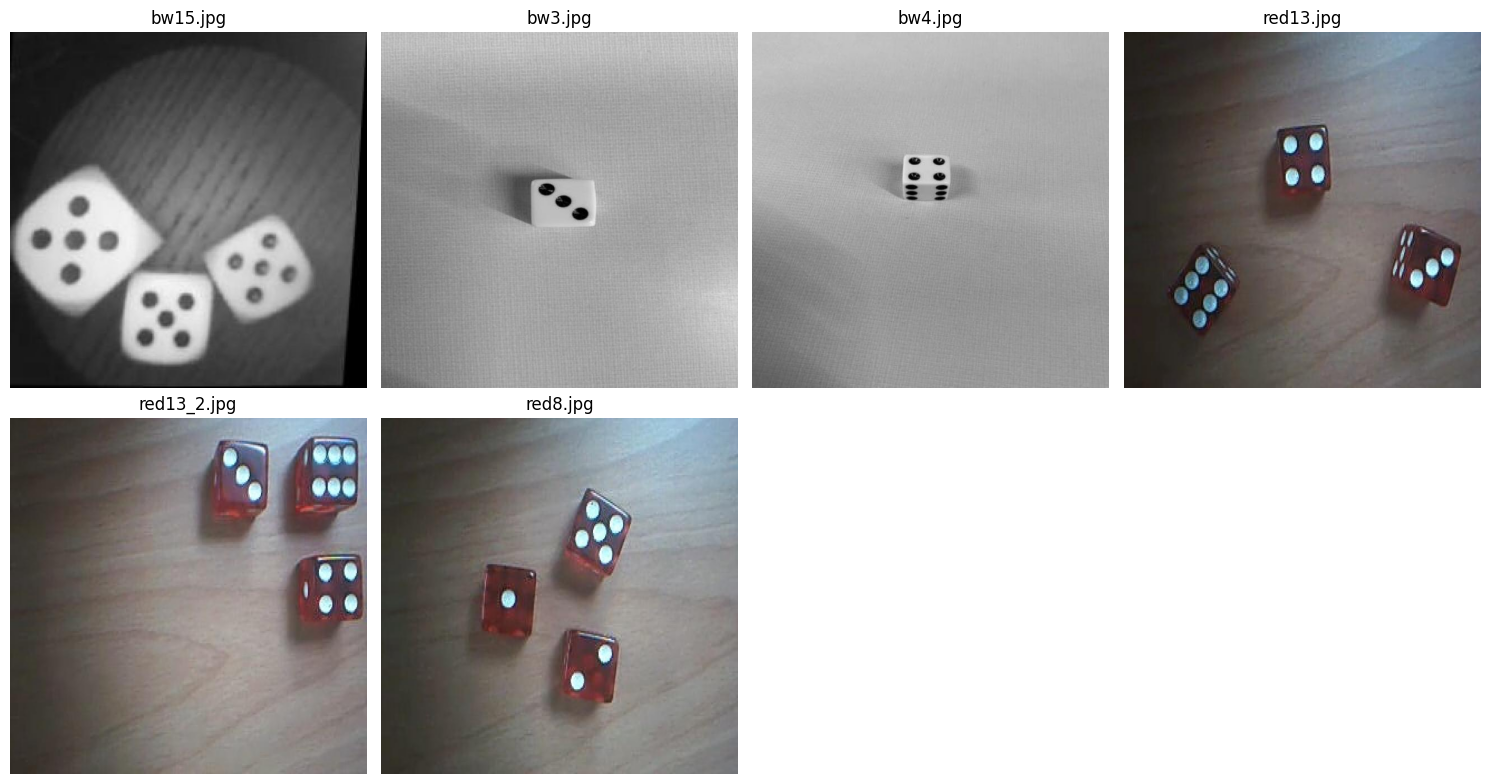

In [16]:
imagens_originais = []
for nome in arquivos:
    img = io.imread(os.path.join(caminho_diretorio, nome))
    imagens_originais.append(img)


print("Exibindo imagens originais...")
exibe_grade(imagens_originais, arquivos)

Aplicação da operação de conversão para a escala de cinza e a exibição das imagens do mesmo

Exibindo imagens em escala de cinza...


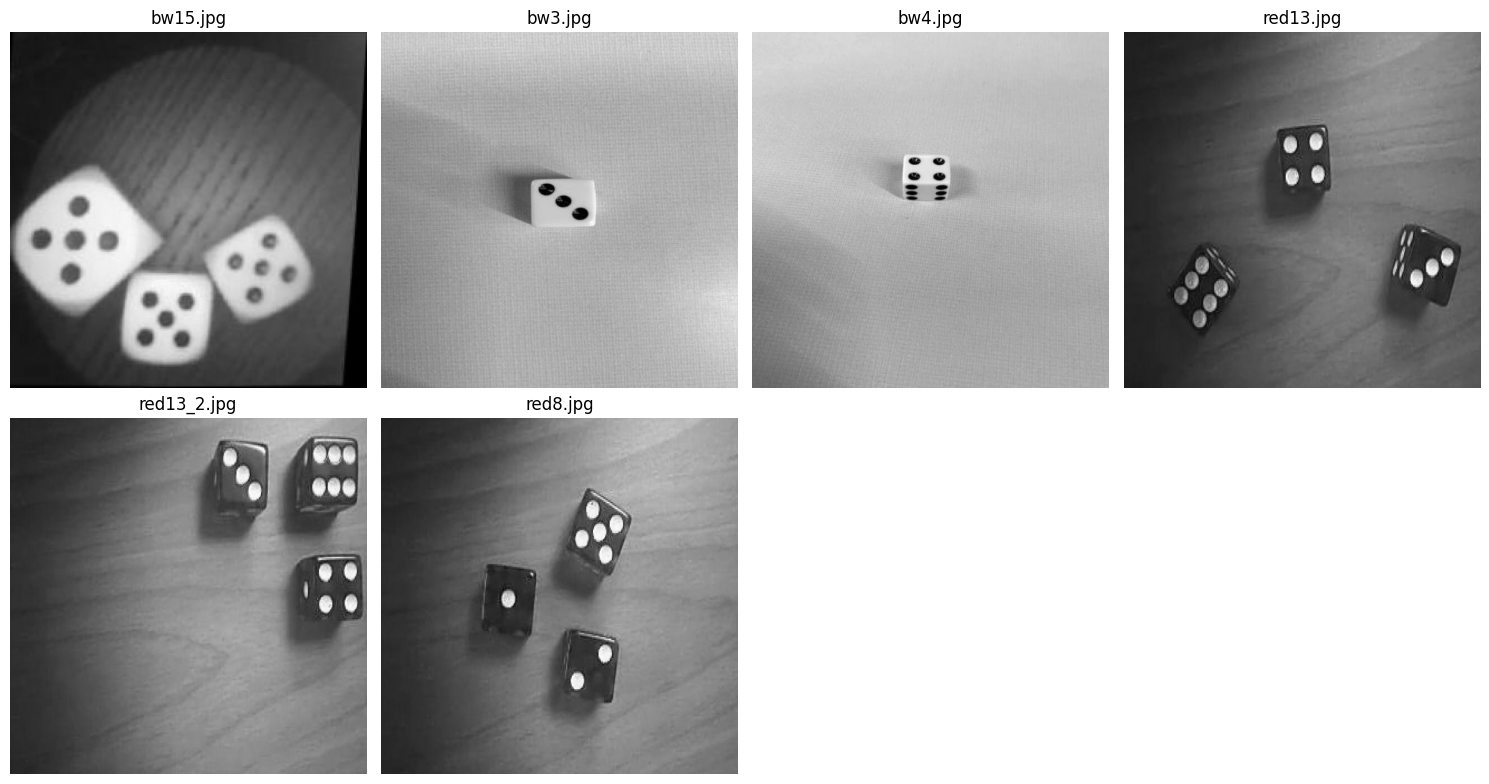

In [17]:
imagens_cinza = converter_para_cinza(imagens_originais)

print("Exibindo imagens em escala de cinza...")
# Importante: para imagens em cinza, passamos cmap='gray'
exibe_grade(imagens_cinza, arquivos, mapa_cor='gray')

Aplicação da operação de suavização em cada imagem do dataset e a exibição das mesmas após a operação.

6 imagens foram suavizadas com sucesso!
Exibindo imagens suavizadas (Noise Reduction):


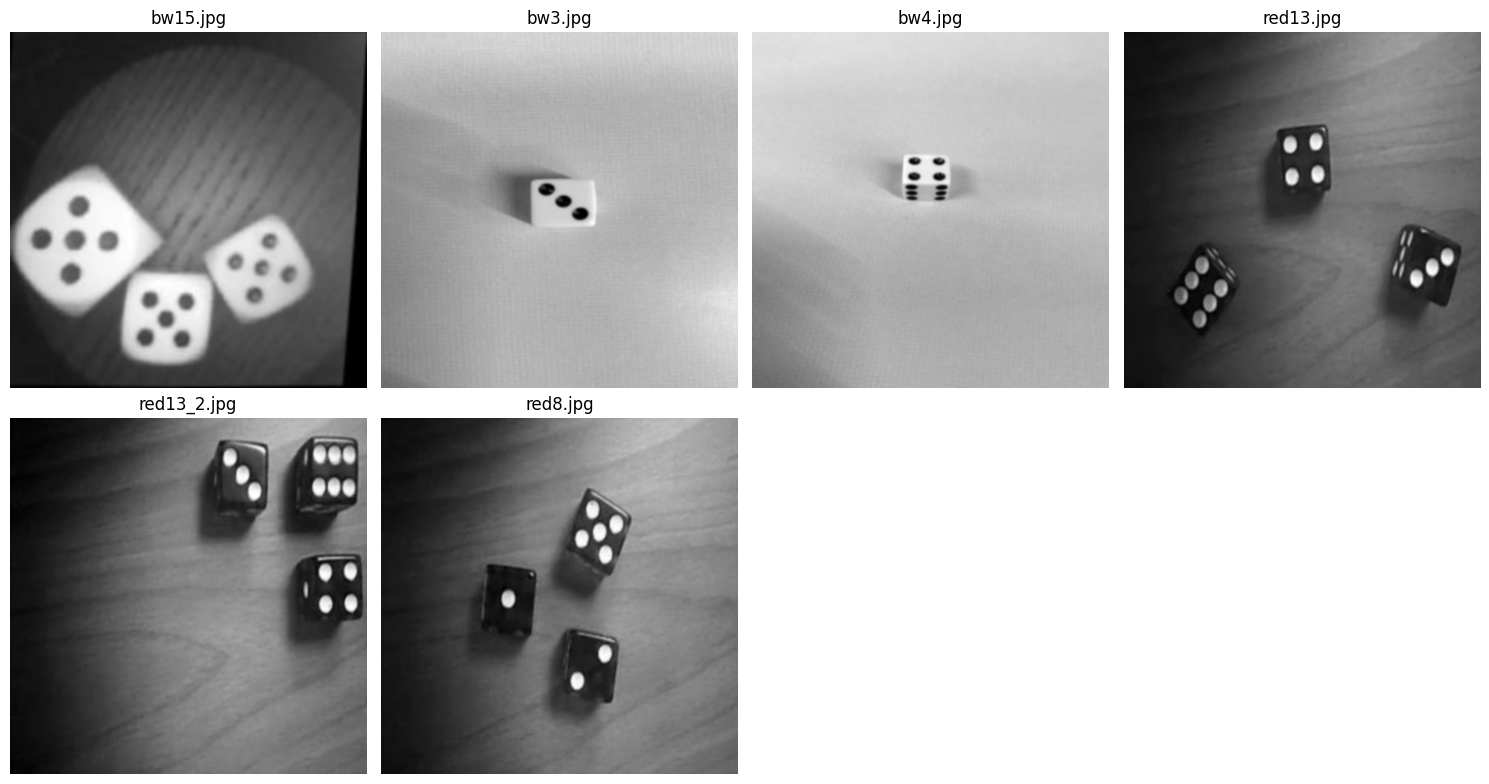

In [18]:
# Aplicando a suavização com sigma=1.5 em todas as imagens
# O sigma define a "força" do borrão. 1.5 é um valor equilibrado para OCR.
imagens_suavizadas = [filters.gaussian(img, sigma=1.5) for img in imagens_cinza]

print(f"{len(imagens_suavizadas)} imagens foram suavizadas com sucesso!")

# Exibindo o resultado usando a função que criamos anteriormente
print("Exibindo imagens suavizadas (Noise Reduction):")
exibe_grade(imagens_suavizadas, arquivos, mapa_cor='gray')

Operação de detectação de bordas dos objetos de cada imagem presente no dataset escolhido.

Bordas extraídas de 6 imagens.
Exibindo detecção de bordas (Sobel):


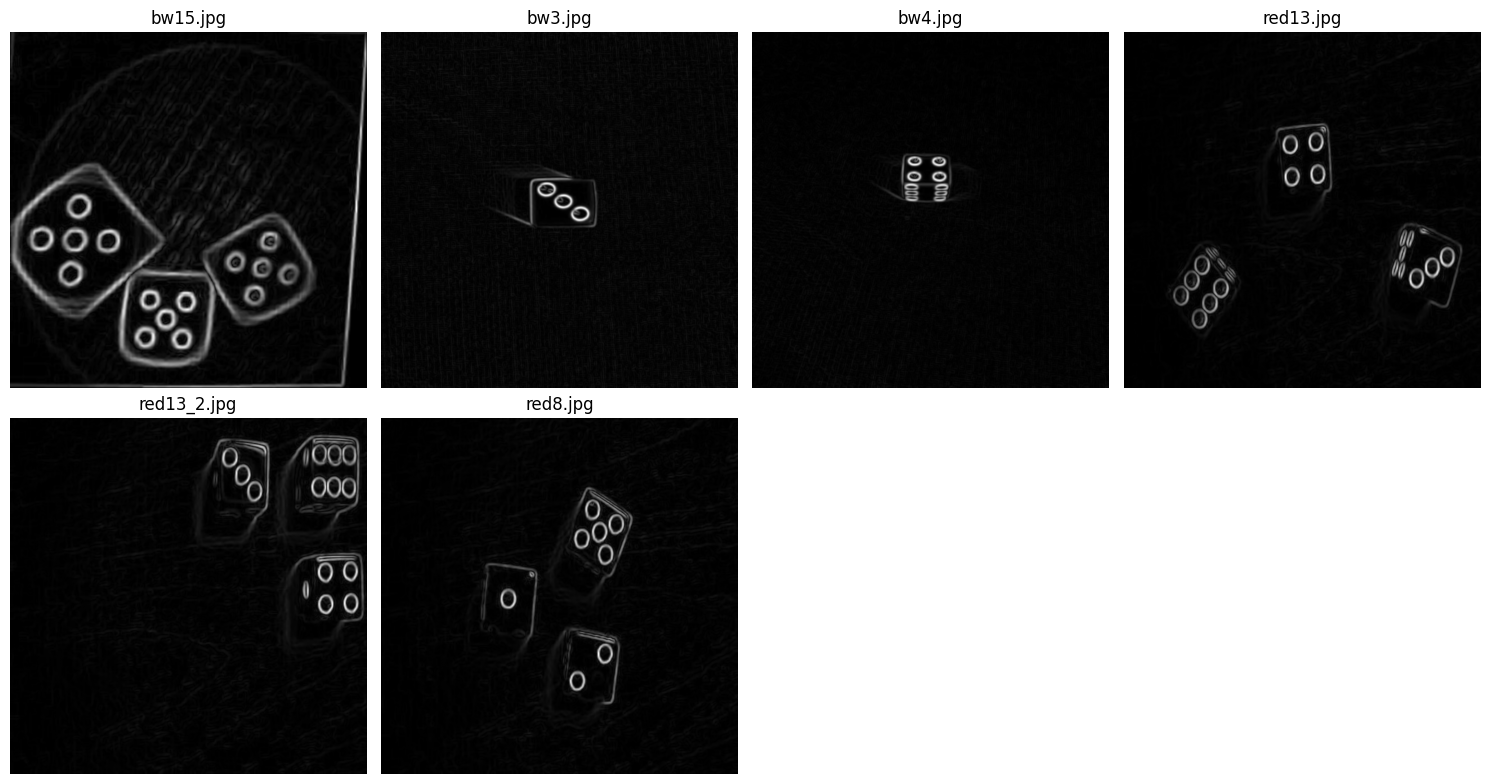

In [19]:
from skimage import filters

imagens_limites = [filters.sobel(img) for img in imagens_suavizadas]

print(f"Bordas extraídas de {len(imagens_limites)} imagens.")

print("Exibindo detecção de bordas (Sobel):")
exibe_grade(imagens_limites, arquivos, mapa_cor='gray')

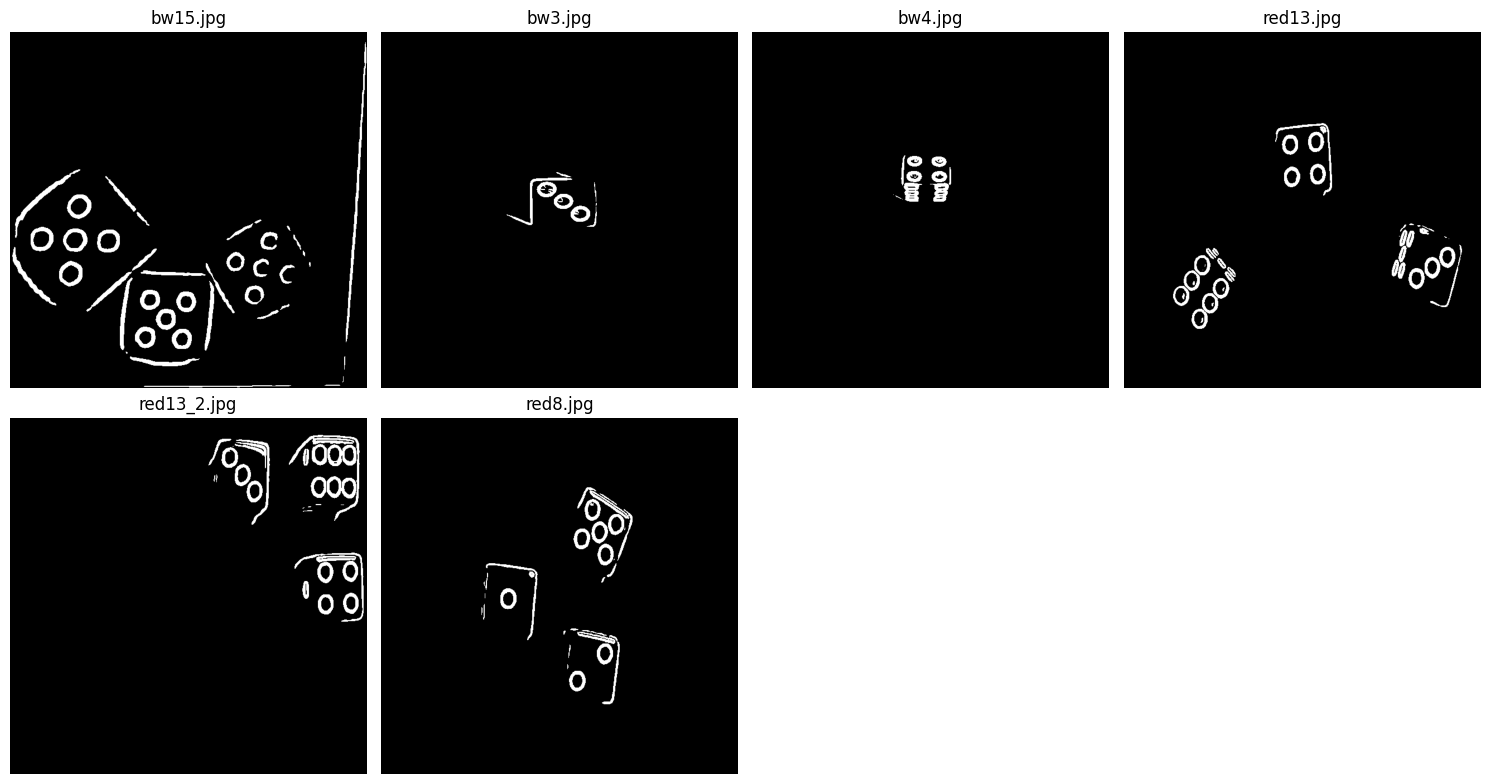

In [20]:
#binarizar
imagens_limites_bin = [img > 0.05 for img in imagens_limites]
exibe_grade(imagens_limites_bin, arquivos, mapa_cor='gray')

In [21]:
from skimage.morphology import dilation, disk

imagens_limites_bin = [
    dilation(img, disk(2))
    for img in imagens_limites_bin
]
exibe_grade(imagens_limites_bin, arquivos, mapa_cor='gray')

KeyboardInterrupt: 

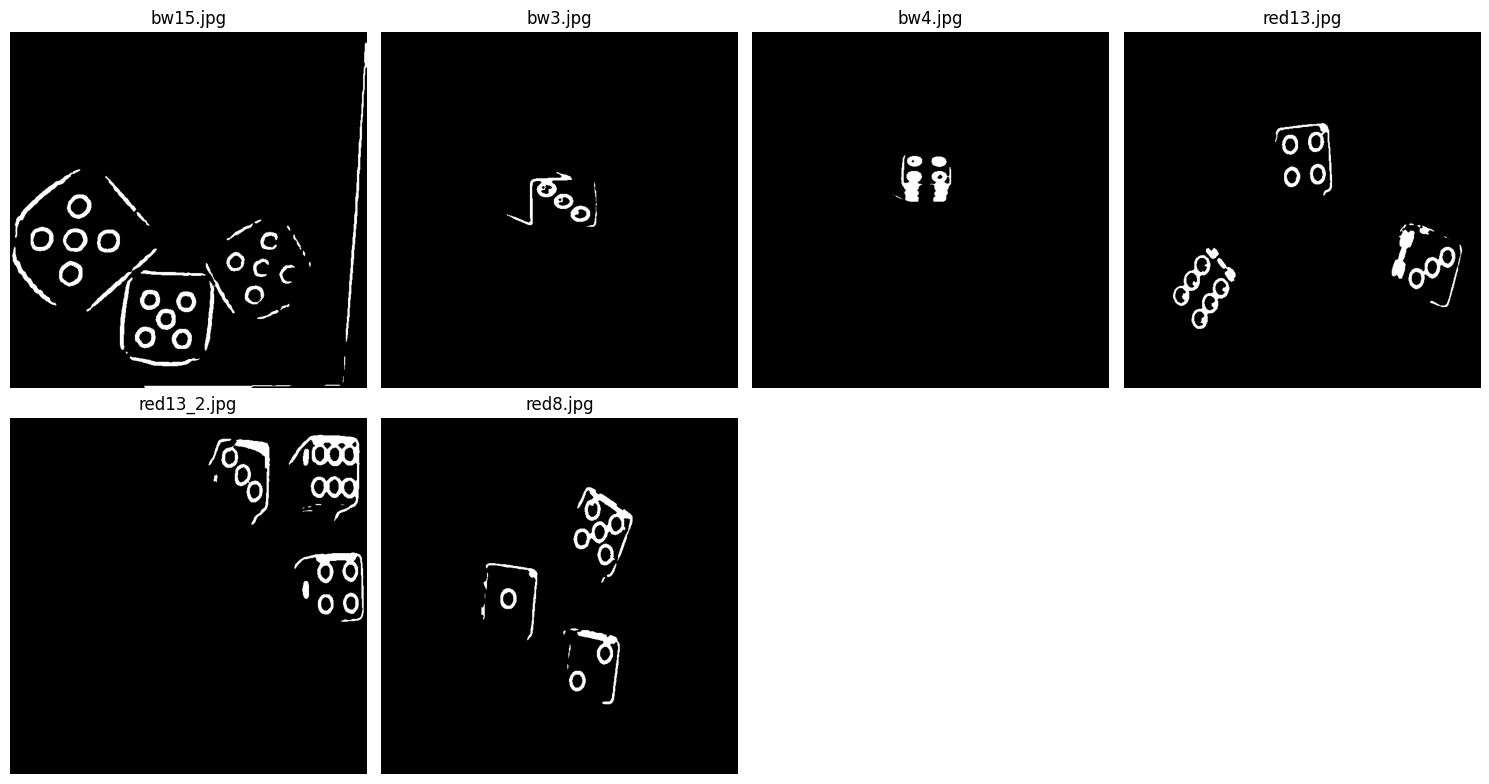

In [ ]:
# from skimage.morphology import closing
# from skimage.morphology import dilation, disk

# imagens_limites_bin = [
#     closing(img, disk(2))
#     for img in imagens_limites_bin
# ]
# exibe_grade(imagens_limites_bin, arquivos, mapa_cor='gray')

In [ ]:
# from skimage.transform import hough_circle, hough_circle_peaks
# from skimage.draw import circle_perimeter

# img_bordas = imagens_limites_bin[0]
# raios = np.arange(18, 20,2)
# raio_medio = int(np.mean(raios))
# hough_res = hough_circle(img_bordas, raios)
# accums, cx, cy, r = hough_circle_peaks(
#     hough_res,
#     raios,
#     total_num_peaks=150,
#     min_xdistance=raio_medio,
#     min_ydistance=raio_medio,
#     threshold=hough_grade.max()*.4)

# print(f"Número de bolinhas detectadas: {len(cx)}")

Número de bolinhas detectadas: 58


Versão Inicial:

In [32]:
img_bordas = imagens_limites_bin[0]  

raios = np.arange(10, 25, 2)

hough_res = hough_circle(img_bordas, raios)

accums, cx, cy, r = hough_circle_peaks(
    hough_res,
    raios,
    total_num_peaks=15
)

print(f"Número de bolinhas detectadas: {len(cx)}")

Número de bolinhas detectadas: 15


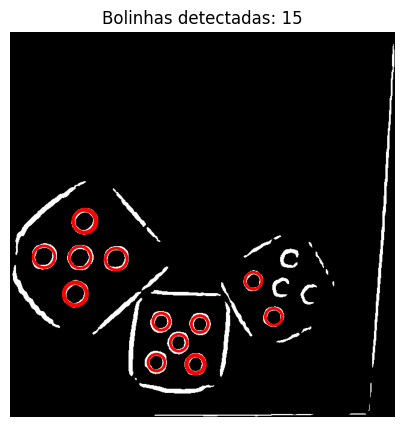

In [30]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(img_bordas, cmap='gray')

for center_y, center_x, radius in zip(cy, cx, r):
    circ = plt.Circle(
        (center_x, center_y),
        radius,
        color='red',
        fill=False,
        linewidth=2
    )
    ax.add_patch(circ)

ax.set_title(f"Bolinhas detectadas: {len(cx)}")
ax.axis('off')
plt.show()